<a href="https://colab.research.google.com/github/scudilio/CursoDDS/blob/main/M%C3%B3dulo_4_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Cost Data**

## Importação dos dados

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dados.shape

(1338, 7)

## Algum pré-processamento interessante antes de prosseguir: 

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

**Variáveis que vamos considerar na análise, nesse primeiro momento: charges, bmi, smoker.**

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---

## Gráficos pertinentes

In [ ]:
import seaborn as sns

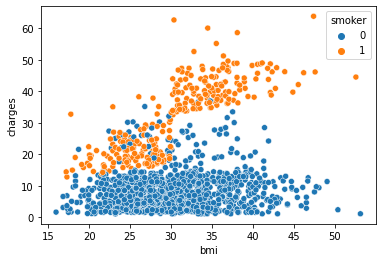

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## Separando a variável alvo (target, label, dependente) das covariáveis (variavéis independentes)

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

##Método de Validação: Holdout

In [ ]:
# Holdout
# Separando em dados teste e treinamento 

from sklearn.model_selection import train_test_split 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)



In [ ]:
Xteste.shape

(335, 2)

In [ ]:
Xtreino.head()

,bmi,smoker
62,24.70,0
809,25.84,0
718,36.67,0
501,26.03,0
922,31.00,0


In [ ]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
#ajuste na amostra treino
reg = LinearRegression()
reg.fit(Xtreino, ytreino)


#predição amostra teste
preditos = reg.predict(Xteste)




##**Métrica de avaliação**: Erro quadrático médio (Mean Square Error - MSE)


In [ ]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 49.55


Nesse cenário, o modelo de regressão linear é dado por

* Se fumante = sim 

 **CUSTOS = b0 + b1 * IMC + b2 * fumante**

* Se fumante = não 

  **CUSTOS = b0 + b1 * IMC **


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -4.13346820585425
Coeficientes: 
 [ 0.41548418 23.4399997 ]


##Reta ajustada



In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

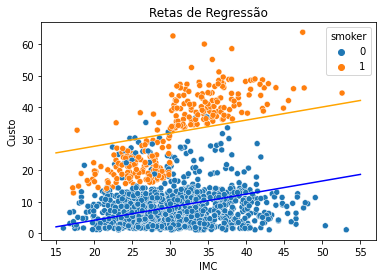

In [ ]:
import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

---

### **Holdout repetido**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [ ]:
# Resolução

R = 100
eqms = []

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    reg = LinearRegression()
    reg.fit(Xtreino, ytreino)
    preditos = reg.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
    eqms.append(eqm)

In [ ]:
np.mean(eqms)

50.48430799181078

---

In [ ]:
def HoldoutRep(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino)
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))

    return res_treino, res_teste 

In [ ]:
HoldoutRep(replicas = 1000)

EQM médio de TREINO: 50.08
EQM médio de TESTE: 50.44


(50.08, 50.44)

-------------------------------------------------------------------------------------------------------

#**Mais Modelos de Regressão** 

## **K-Vizinhos Mais Próximos (K-Nearest Neighbors)**

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges'] 

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 60)
knnreg.fit(Xtreino, ytreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                    weights='uniform')

In [ ]:
from sklearn.metrics import mean_squared_error

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(eqm_treino))
print('O Erro Quadrático Médio de TESTE foi:  {:.2f}'.format(eqm_teste))

O Erro Quadrático Médio de TREINO foi: 136.34
O Erro Quadrático Médio de TESTE foi:  145.25


O resultado pelo holdout é dado por:

In [ ]:
HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 500), replicas = 100)

EQM médio de TREINO: 140.83
EQM médio de TESTE: 140.98


(140.83, 140.98)

Plotando a solução

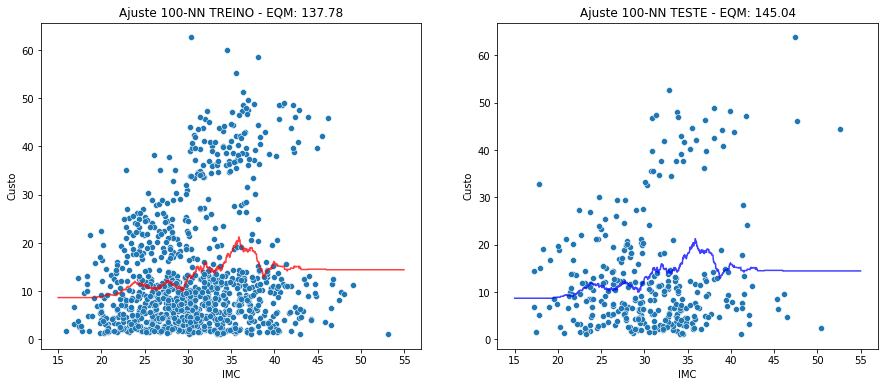

In [ ]:
k = 100
knnreg = KNeighborsRegressor(n_neighbors = k)
knnreg.fit(Xtreino, ytreino)

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y0 = knnreg.predict(x.reshape(-1, 1))


plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino.reshape(-1), y = ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

 

### **Exercício**
Encontre uma maneira de descobrir qual é o melhor quantidade de vizinhos para se utilizar no KNN. Verifique para os casos quando se usa apenas a variável **bmi** como preditora e quando se usa as variáveis **bmi** e **smoker**.

---

## **Árvores de Regressão**

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges'] 

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)


In [ ]:
#Treinando o Modelo
from sklearn.tree import DecisionTreeRegressor

arvore = DecisionTreeRegressor(max_depth = 7, min_samples_split = 50)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O Erro Quadrático Médio no TREINO foi: {:.2f}'.format(eqm_treino))
print('O Erro Quadrático Médio no TESTE foi:  {:.2f}'.format(eqm_teste))

O Erro Quadrático Médio no TREINO foi: 128.62
O Erro Quadrático Médio no TESTE foi:  151.89


O resultado pelo holdout é dado por:

In [ ]:
HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 3), replicas = 1000)

EQM médio de TREINO: 136.42
EQM médio de TESTE: 145.64


(136.42, 145.64)

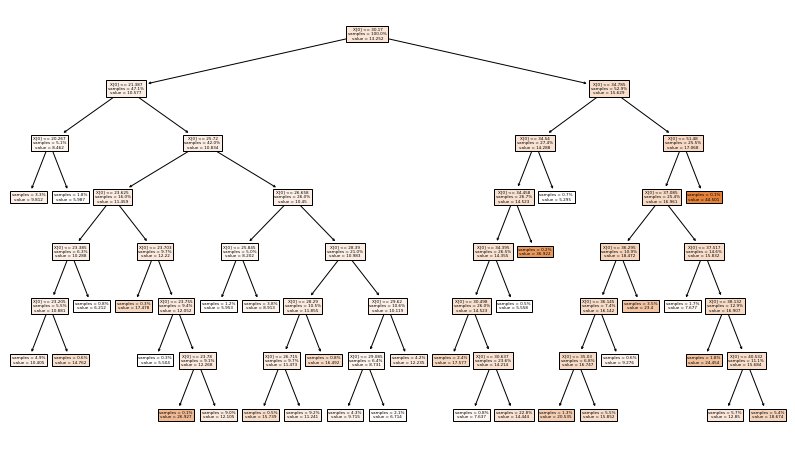

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = True, impurity = False)#, feature_names = Xtest'bmi'])
plt.show()

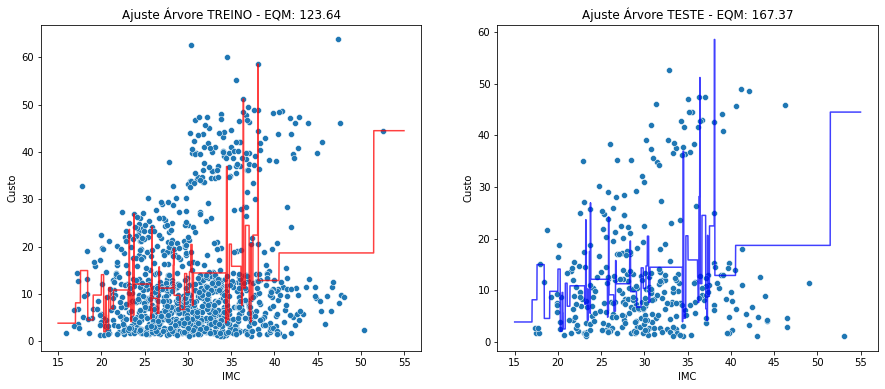

In [ ]:
# Gráficos do ajuste

profundidade = 7
arvore = DecisionTreeRegressor(max_depth = profundidade, min_samples_split = 5)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y0 = arvore.predict(x.reshape(-1, 1))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino.reshape(-1), y = ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

### **Exercício**
Repita o exercício anterior agora no contexto de árvores. Procure pelo melhor valor da profundidade nos dois casos considerados. 

-----------------------------------------------------------------------------

## **Exemplo**
Comparação de modelos levando em conta a regressão linear, quatro cenários de árvores e quatro cenários de KNN. Os resultados finais foram resumidos em uma tabela. 

In [ ]:
r = 1000
reglin = HoldoutRep(modelo = LinearRegression(), replicas = r)
arvore1 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 1), replicas = r)
arvore3 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 3), replicas = r)
arvore5 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 5), replicas = r)
arvore7 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 7), replicas = r)
knn1 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 1), replicas = r)
knn10 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 10), replicas = r)
knn30 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 30), replicas = r)
knn90 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 90), replicas = r)



EQM médio de TREINO: 140.69
EQM médio de TESTE: 141.36
EQM médio de TREINO: 140.24
EQM médio de TESTE: 142.15
EQM médio de TREINO: 136.33
EQM médio de TESTE: 145.94
EQM médio de TREINO: 129.06
EQM médio de TESTE: 155.28
EQM médio de TREINO: 118.74
EQM médio de TESTE: 168.7
EQM médio de TREINO: 145.32
EQM médio de TESTE: 288.85
EQM médio de TREINO: 127.97
EQM médio de TESTE: 155.48
EQM médio de TREINO: 135.36
EQM médio de TESTE: 145.37
EQM médio de TREINO: 138.57
EQM médio de TESTE: 142.29


In [ ]:
modelos = [reglin, arvore1, arvore3, arvore5, arvore7, knn1, knn10, knn30, knn90]

nomes = ['Reg. Linear', 'Arvore (prof = 1)', 'Arvore (prof = 3)', 'Arvore (prof = 5)', 'Arvore (prof = 7)',
         'KNN (k = 1)', 'KNN (k = 10)', 'KNN (k = 30)', 'KNN (k = 90)']

In [ ]:
resultados = pd.DataFrame(modelos, index = nomes, columns = ['EQM Treino', 'EQM Teste'])
resultados

,EQM Treino,EQM Teste
Reg. Linear,140.69,141.36
Arvore (prof = 1),140.24,142.15
Arvore (prof = 3),136.33,145.94
Arvore (prof = 5),129.06,155.28
Arvore (prof = 7),118.74,168.70
KNN (k = 1),145.32,288.85
KNN (k = 10),127.97,155.48
KNN (k = 30),135.36,145.37
KNN (k = 90),138.57,142.29


In [ ]:
resultados.sort_values(by = 'EQM Teste')

,EQM Treino,EQM Teste
Reg. Linear,140.69,141.36
Arvore (prof = 1),140.24,142.15
KNN (k = 90),138.57,142.29
KNN (k = 30),135.36,145.37
Arvore (prof = 3),136.33,145.94
Arvore (prof = 5),129.06,155.28
KNN (k = 10),127.97,155.48
Arvore (prof = 7),118.74,168.70
KNN (k = 1),145.32,288.85


Portanto, dentre os modelos considerados, o KNN com K = 90 foi o que apresentou melhor performance nos dados de teste.

---



---

---


# **Gráficos do ajuste com duas variáveis**

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

## Regressão Linear

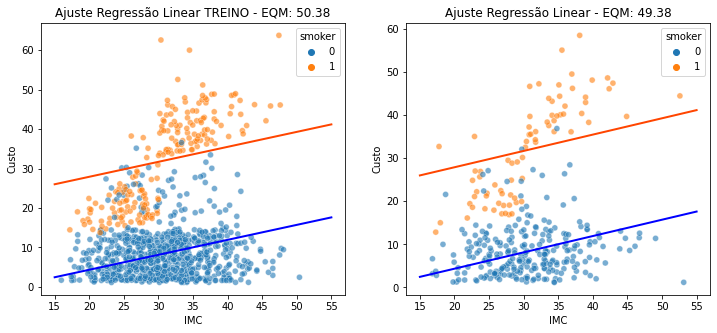

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo = LinearRegression()
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Regressão Linear TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste Regressão Linear - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

## KNN

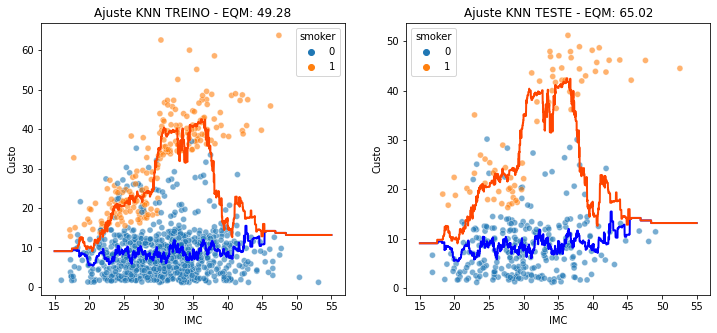

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

k = 20
modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste KNN TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

 
## Árvore de Decisão

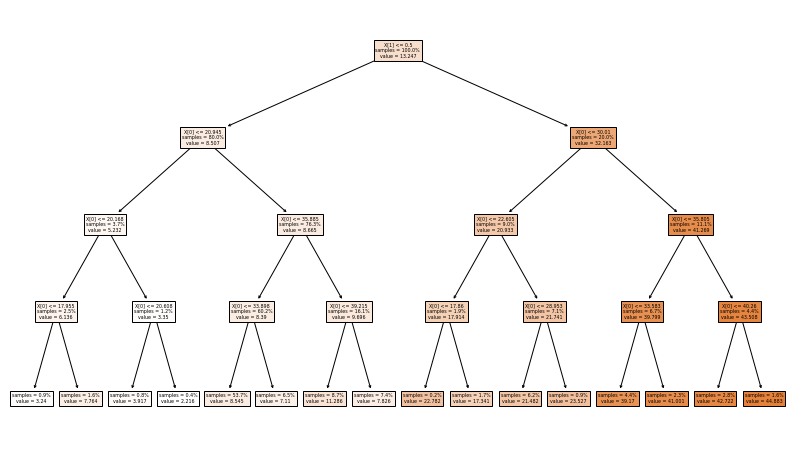

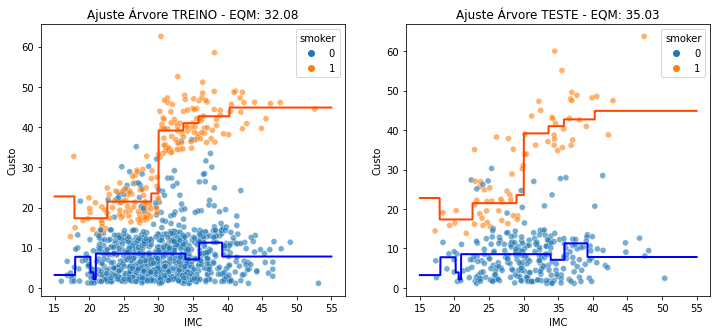

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

profundidade = 4
modelo = DecisionTreeRegressor(max_depth = profundidade)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 
 
plt.figure(figsize = (14, 8))
plot_tree(modelo, filled=True, proportion = True, impurity = False) 
plt.show()

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()